# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 2
### Consigna: Implementar una DFT
XX = mi_funcion_DFT( xx )
### Bonus
Probar las mismas experiencias con la transformada rápida de Fourier (DFT rápida se llama FFT).
Calcular la DFT de una señal aleatoria, por ejemplo ruido uniforme de varianza σ² = 4. Pueden encontrar cómo depende la varianza de los parámetros de la distribución aquí.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import signal
from scipy.fft import fft

In [48]:
# #Vi por ahi en internet que tambien hay quienes definen t como:
# N=1e3
# fs=1e3
# t = np.arange(N) / fs

##Cantidad de muestras
N=1000

##vector tiempo de 0 a 1, no incluido, con N saltos
t = np.linspace(0, 1, N, endpoint=False)

#senoidal de amplitud 1 y 1 hz de frecuencia
amp=1 #amplitud en volts
freq=1 #frecuencia en Hz
seno = amp*np.sin(2 * np.pi * freq * t)
print(len(seno))
# #visualizacion de la senoidal
# plt.plot(t, seno)
# plt.show()

1000


In [49]:
def mi_funcion_DFT( xx ):
    ##Mi dft calcula la dft de la señal ingresada e imprime por pantalla con un grid
    ##A su vez devuelve a la salida el array del resultado
    #inicializacion de lo que va a ser mi vector de salida para la DFT
    ##print(len(xx)) la cantidad de elementos que tiene xx ya que hago mi salida de igual cantidad
    y = np.array([0+0j]).repeat(len(xx))
    
    #aplico la formula que vimos en clase
    # esto: https://aulasvirtuales.frba.utn.edu.ar/pluginfile.php/1310601/course/section/122726/2-Frequency%20analysis%20and%20FFT.pdf
    #y un for para que lo haga N veces
    for k in range(len(xx)):
        y[k] = np.sum(xx * np.exp(-2j * np.pi * k * np.arange(len(xx))/len(xx)))
          
    #Esto ultimo tengo dudas, lo hago porque Y tiene por indice [0;N]
    #pero conceptualmente no se si es correcto
    #y grafico el modulo porque sino pierdo la parte imaginaria que es donde esta mi informacion ya que estoy usando un seno
    plt.plot(np.arange(len(xx)), np.absolute(y))
    ###NO me acuerdo los ejes y esas cosas y el campus esta caido!!!!!!
    plt.title('Mi DFT')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud')
#     notita = mpatches.Patch(label='xx')
#     plt.legend(handles=[notita])
    plt.grid()
    plt.show()
    return y

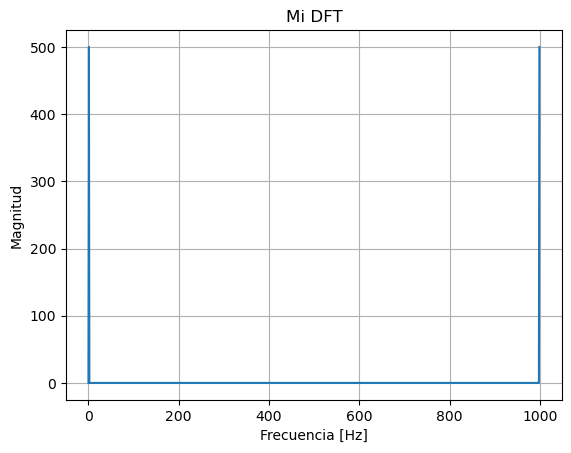

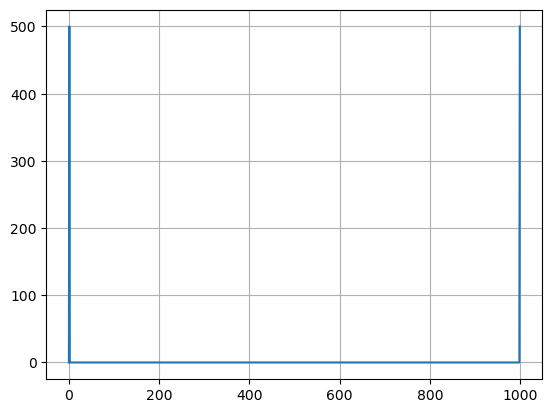

In [50]:
#Si saco el ; me imprime el array de salida tambien!
mi_seno=mi_funcion_DFT( seno )
#Comparacion con fft
prueba_seno=fft(seno)
plt.plot(np.arange(len(prueba_seno)), np.absolute(prueba_seno))
plt.grid()
plt.show()

# Primeras Conclusiones:
Visualmente son identicos, pero para revisar voy a restarlos elemento a elemento y deberian dar 0 o valores muy cercanos...<br>
A continuacion las verificaciones

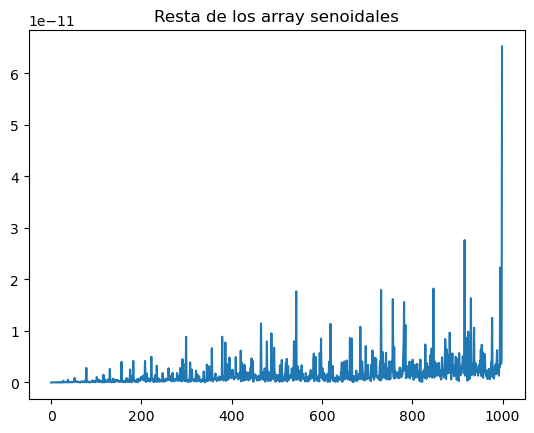

In [51]:
mi_seno-prueba_seno
#La lista es ilegible vamos a hacer algo...
resta=mi_seno-prueba_seno
plt.plot(np.arange(len(resta)), np.absolute(resta))
plt.title('Resta de los array senoidales')
plt.show()

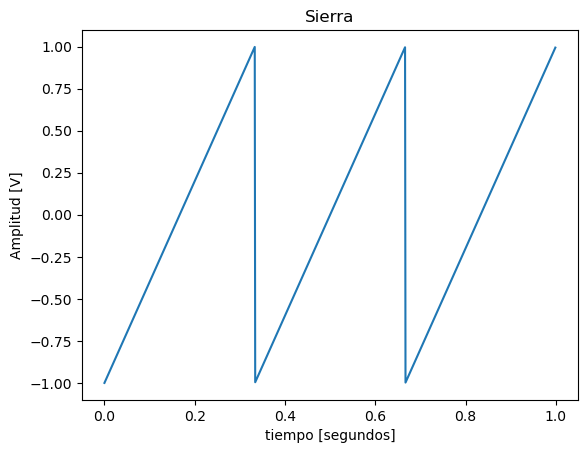

In [52]:
sawtooth=signal.sawtooth(2 * np.pi * 3 * t)
plt.plot(t, sawtooth)
plt.title('Sierra')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()

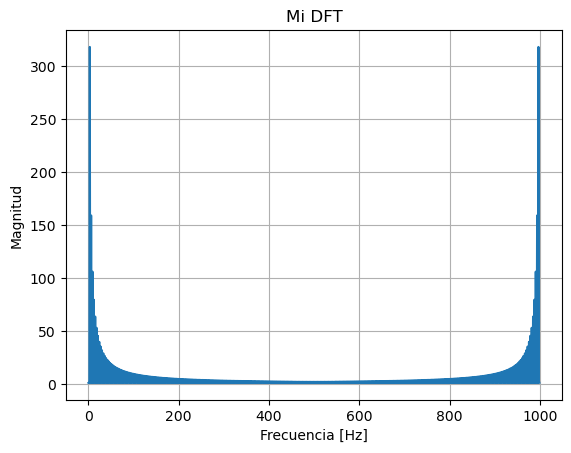

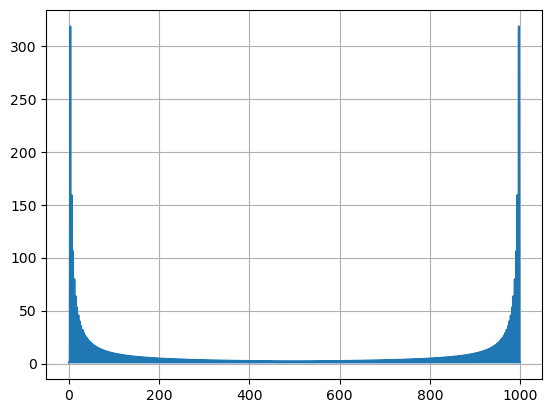

In [53]:
mi_sawtooth=mi_funcion_DFT( sawtooth )
#Comparacion con fft
prueba_sawtooth=fft(sawtooth)
plt.plot(np.arange(len(prueba_sawtooth)), np.absolute(prueba_sawtooth))
plt.grid()
plt.show()

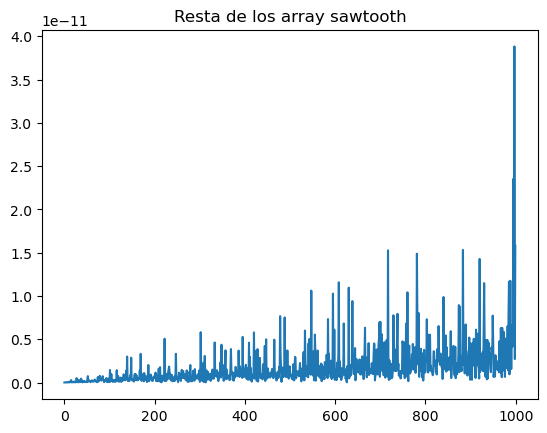

In [54]:
mi_sawtooth-prueba_sawtooth
#La lista es ilegible vamos a hacer algo...
resta2=mi_sawtooth-prueba_sawtooth
plt.plot(np.arange(len(resta2)), np.absolute(resta2))
plt.title('Resta de los array sawtooth')
plt.show()

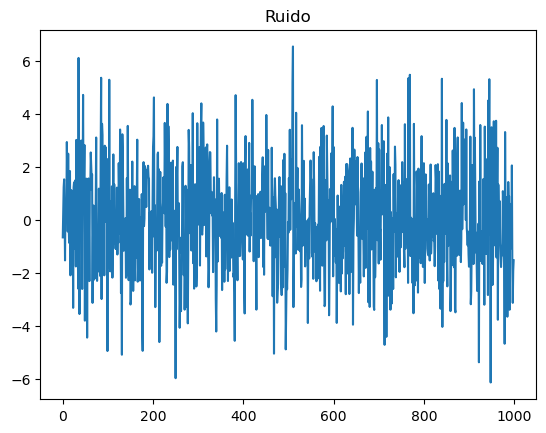

In [55]:
##Ruido centrado en 0 con var^2=4 y 100 muestras
Muestras=1000
Centro=0
Varianza_cuadrada=4
noise = np.random.normal(Centro, np.sqrt(Varianza_cuadrada), Muestras)
plt.plot(np.arange(Muestras), noise)
plt.title('Ruido')
plt.show()

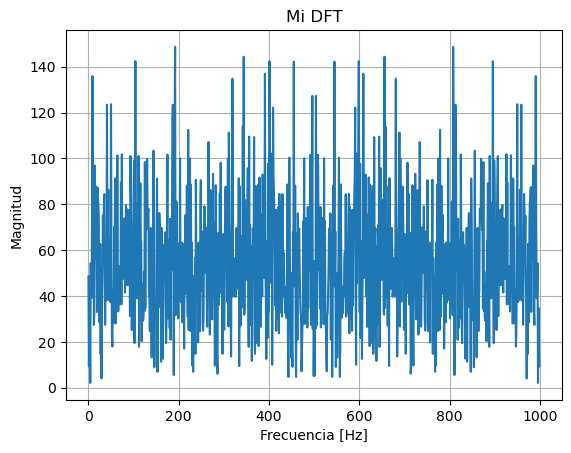

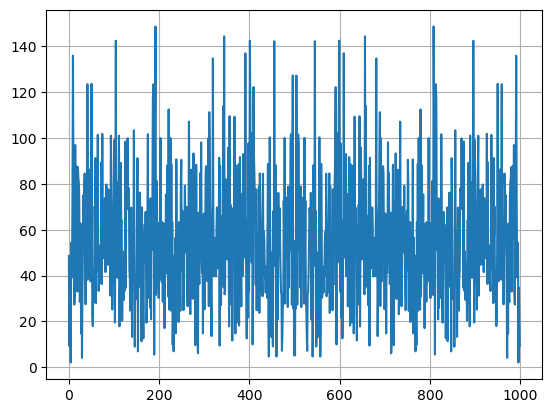

In [56]:
mi_ruido=mi_funcion_DFT( noise )
#Comparacion con fft
prueba_ruido=fft(noise)
plt.plot(np.arange(len(prueba_ruido)), np.absolute(prueba_ruido))
plt.grid()
plt.show()

## No se que deberia ver en el ruido perdon!
Salvo que hay algo en todas las componentes de frecuencia